<a href="https://colab.research.google.com/github/prisca31/child_mortality_worldwide/blob/main/ProjectMI_machine_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning on the infant mortality project - prediction : how many lives can be saved ?
Exploration & Regression model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/df_mi_full.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id_key                             3757 non-null   object 
 1   Country                            3757 non-null   object 
 2   Year                               3757 non-null   int64  
 3   IDH                                3689 non-null   float64
 4   gnipc                              3749 non-null   float64
 5   gnipc_f                            3308 non-null   float64
 6   gnipc_m                            3308 non-null   float64
 7   GDI                                3256 non-null   float64
 8   gii                                3084 non-null   float64
 9   mf                                 3125 non-null   float64
 10  co2_prod                           3757 non-null   float64
 11  School                             3703 non-null   float

In [ ]:
#df_health = df[['id_key', 'Country', 'Year', 'IDH_category', 'IDH', 'gnipc', 'co2_prod', 'health_expends_1_ppp', 'external_finance_pc', 'doctors' ]]

In [ ]:
df_ML = df[['id_key', 'Country', 'IDH', 'gnipc_f', 'GDI', 'gii', 'health_expends_1_ppp', 'infant_death_5_10000' ]]

In [ ]:
df_ML = df_ML.dropna()
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 8 to 3756
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_key                3020 non-null   object 
 1   Country               3020 non-null   object 
 2   IDH                   3020 non-null   float64
 3   gnipc_f               3020 non-null   float64
 4   GDI                   3020 non-null   float64
 5   gii                   3020 non-null   float64
 6   health_expends_1_ppp  3020 non-null   float64
 7   infant_death_5_10000  3020 non-null   float64
dtypes: float64(6), object(2)
memory usage: 212.3+ KB


In [ ]:
from google.colab import files
df_ML.to_csv('df_ML.csv')
files.download('df_ML.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_sup_3000 = df[['IDH', 'gnipc_f', 'gnipc_m', 'GDI', 'gii', 'mf', 'co2_prod', 'School_f', 'School_m', 'Sec_school_f', 'Sec_school_m', 'health_expends_1_ppp', 'Life_expectancy_female', 'Life_expectancy_male', 'mmr_10000', 'abr_10000', 'infant_death_5_10000' ]]

In [ ]:
df_nona_3000= df_sup_3000.dropna()
df_nona_3000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2765 entries, 8 to 3756
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDH                     2765 non-null   float64
 1   gnipc_f                 2765 non-null   float64
 2   gnipc_m                 2765 non-null   float64
 3   GDI                     2765 non-null   float64
 4   gii                     2765 non-null   float64
 5   mf                      2765 non-null   float64
 6   co2_prod                2765 non-null   float64
 7   School_f                2765 non-null   float64
 8   School_m                2765 non-null   float64
 9   Sec_school_f            2765 non-null   float64
 10  Sec_school_m            2765 non-null   float64
 11  health_expends_1_ppp    2765 non-null   float64
 12  Life_expectancy_female  2765 non-null   float64
 13  Life_expectancy_male    2765 non-null   float64
 14  mmr_10000               2765 non-null   float

In [ ]:
#X = df_nona_3000[['IDH', 'gnipc_f', 'gnipc_m', 'GDI', 'gii', 'mf', 'co2_prod', 'School_f', 'School_m', 'Sec_school_f', 'Sec_school_m', 'health_expends_1_ppp', 'Life_expectancy_female', 'Life_expectancy_male', 'mmr_10000', 'abr_10000']]

In [ ]:
X = df_nona_3000[['IDH', 'gnipc_f', 'GDI', 'gii', 'School_f', 'Sec_school_f', 'health_expends_1_ppp', 'mmr_10000', 'abr_10000']]

In [ ]:
X_mni = df_nona_3000[['IDH', 'gnipc_f', 'GDI', 'gii', 'health_expends_1_ppp']]

In [ ]:
y = df_nona_3000['infant_death_5_10000']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mni,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
score = reg.score(X_test_scaled, y_test)
score

0.8419540849462516

In [ ]:
y.pred

AttributeError: 'Series' object has no attribute 'pred'

In [ ]:
df_nona_3000_mini

In [ ]:
df_nona_3000_f = df_nona_3000[['IDH', 'gnipc_f', 'GDI', 'gii', 'School_f', 'Sec_school_f', 'health_expends_1_ppp', 'mmr_10000', 'abr_10000', 'infant_death_5_10000']]

<Axes: >

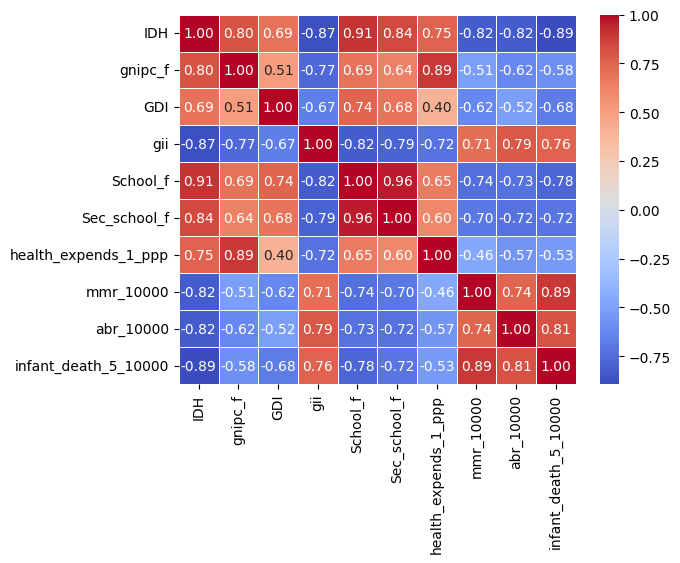

In [ ]:
corr_matrix = df_nona_3000_f.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

<Axes: xlabel='gnipc', ylabel='infant_death_5_10000'>

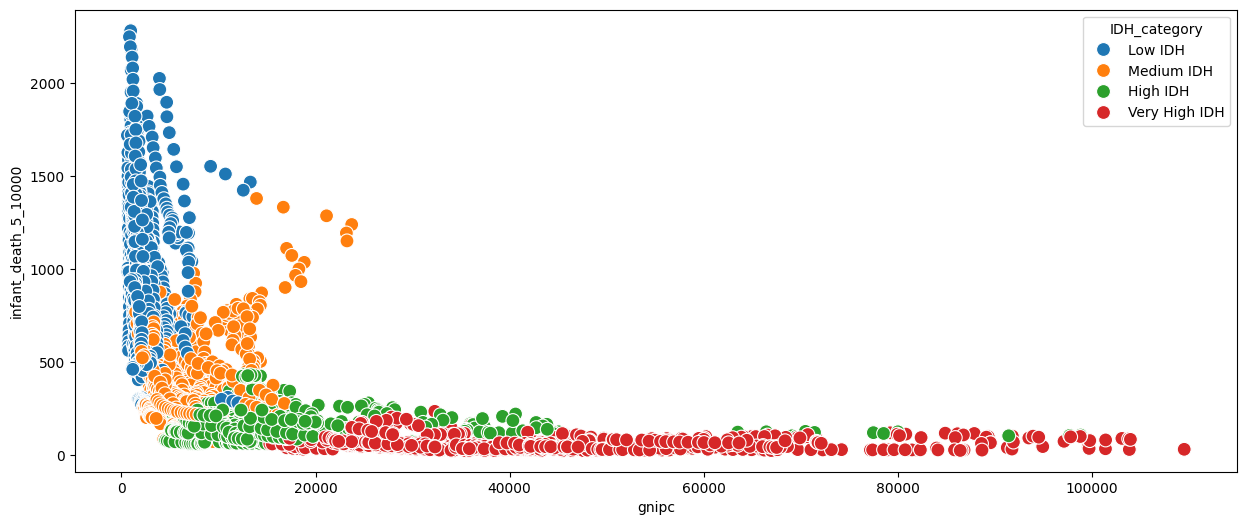

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,6))
sns.scatterplot(df,
                x='gnipc',
                y='infant_death_5_10000',
                hue='IDH_category',
                s=100)

<Axes: xlabel='gii', ylabel='infant_death_5_10000'>

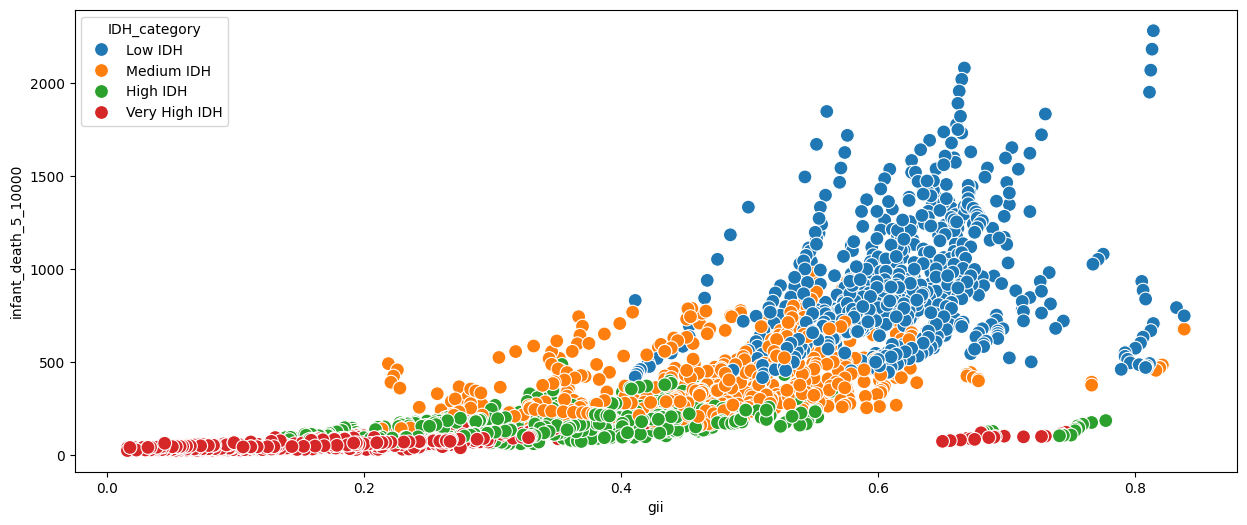

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(df,
                x='gii',
                y='infant_death_5_10000',
                hue='IDH_category',
                s=100)

<Axes: xlabel='GDI', ylabel='infant_death_5_10000'>

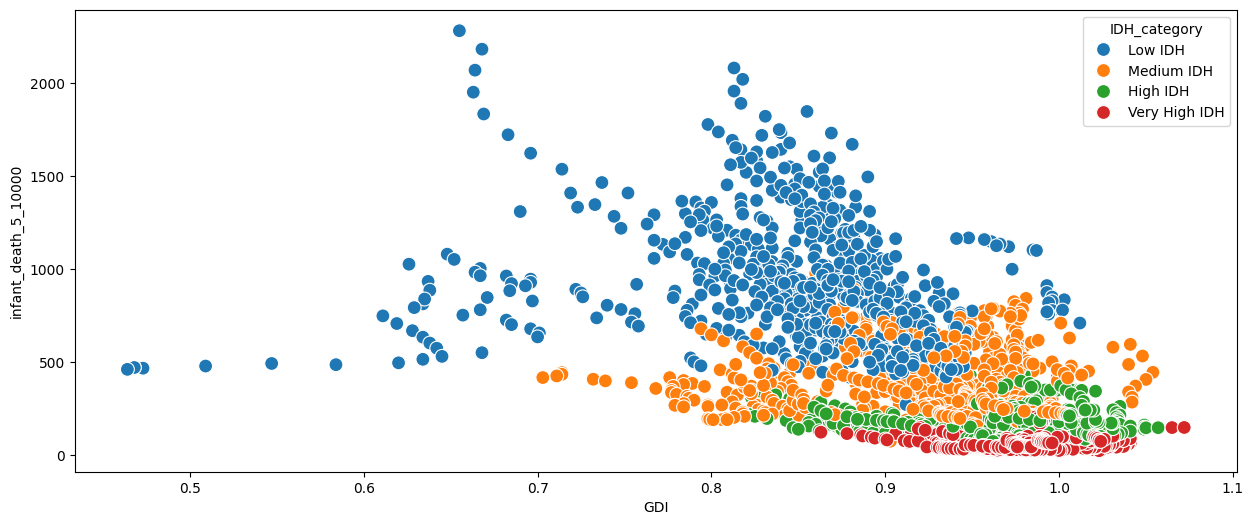

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(df,
                x='GDI',
                y='infant_death_5_10000',
                hue='IDH_category',
                s=100)

In [ ]:
df2 = pd.read_csv('/content/projetMI_machine_learning.csv')
df2['infant_death_5_100'] = df2['infant_death_5_10000']/100
df2 = df2[['IDH', 'gnipc_f', 'GDI', 'gii', 'health_expends_1_ppp', 'infant_death_5_100']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5727 entries, 0 to 5726
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDH                   5169 non-null   float64
 1   gnipc_f               4440 non-null   float64
 2   GDI                   4200 non-null   float64
 3   gii                   4016 non-null   float64
 4   health_expends_1_ppp  3670 non-null   float64
 5   infant_death_5_100    5637 non-null   float64
dtypes: float64(6)
memory usage: 268.6 KB


In [ ]:
df2= df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 3 to 5707
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDH                   3020 non-null   float64
 1   gnipc_f               3020 non-null   float64
 2   GDI                   3020 non-null   float64
 3   gii                   3020 non-null   float64
 4   health_expends_1_ppp  3020 non-null   float64
 5   infant_death_5_100    3020 non-null   float64
dtypes: float64(6)
memory usage: 165.2 KB


<Axes: >

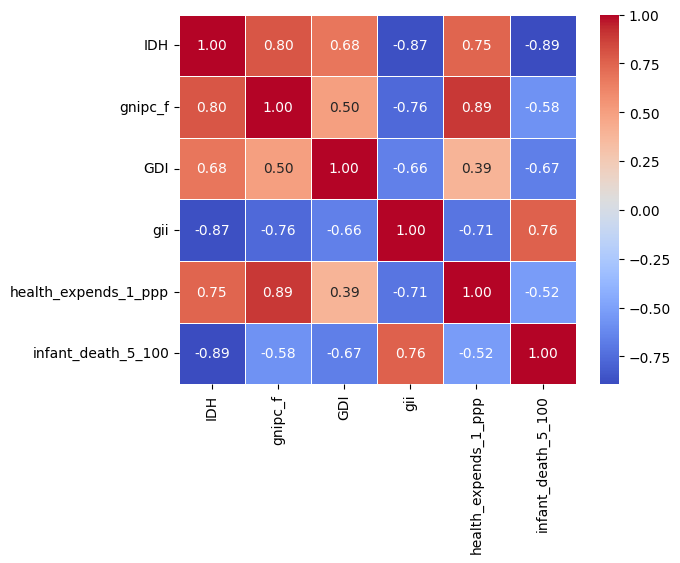

In [ ]:
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [ ]:
#X = df2[['IDH', 'gnipc_f', 'GDI', 'gii', 'health_expends_1_ppp']]
X = df2[['IDH', 'gnipc_f', 'GDI', 'gii']]
y = df2['infant_death_5_100']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
score = reg.score(X_test_scaled, y_test)
score

0.8410332083365778

In [ ]:
y_pred = reg.predict(X_test)
#y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
df = pd.read_csv('/content/bquxjob_2e25019b_1938cbd705b.csv')

In [ ]:
df_health = df[['id_key', 'IDH', 'Country', 'Year', 'health_expends_1_ppp', 'external_finance_pc', 'doctors_10000', 'beds_10000', 'nurses_midwives_10000', 'infant_death_5_10000' ]]

In [ ]:
df_health = df_health.dropna()

In [ ]:
df_wash = pd.read_csv('df_wash.csv')

In [ ]:
df_wash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3757 non-null   int64  
 1   id_key       3757 non-null   object 
 2   IDH          3689 non-null   float64
 3   Country      3757 non-null   object 
 4   Year         3757 non-null   int64  
 5   sanitation   2212 non-null   float64
 6   drinking     2212 non-null   float64
 7   handwashing  2212 non-null   float64
 8   defecation   2212 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 264.3+ KB


In [ ]:
df_wash = df_wash[['id_key', 'sanitation', 'drinking', 'handwashing', 'defecation' ]]
df_wash_health = pd.merge(df_health, df_wash, on=['id_key'], how='inner')

In [ ]:
df_w_h = df_wash_health.dropna()

In [ ]:
df_w_h[['Country']].nunique()

,0
Country,77


In [ ]:
df_w_h = df_w_h[['infant_death_5_10000', 'IDH', 'health_expends_1_ppp', 'external_finance_pc', 'doctors_10000', 'beds_10000', 'nurses_midwives_10000', 'sanitation', 'drinking', 'handwashing', 'defecation']]

<Axes: >

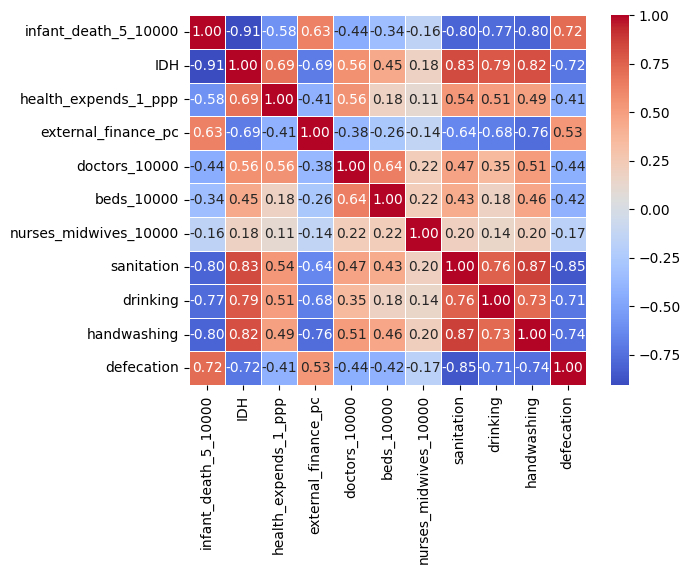

In [ ]:
corr_matrix = df_w_h.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# X = df_w_h[['IDH', 'health_expends_1_ppp', 'external_finance_pc', 'doctors_10000', 'beds_10000', 'nurses_midwives_10000', 'sanitation', 'drinking', 'handwashing', 'defecation']]
# X = df_w_h[['IDH', 'health_expends_1_ppp', 'external_finance_pc', 'doctors_10000', 'beds_10000', 'nurses_midwives_10000']]
#X = df_w_h[['IDH', 'sanitation', 'drinking', 'handwashing', 'defecation']]
X = df_w_h[['IDH']]
y = df_w_h['infant_death_5_10000']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
score = reg.score(X_test_scaled, y_test)
score

0.8144556447757877

In [ ]:
y_pred = reg.predict(X_test)